UCS Path: ['A', 'B', 'C', 'D'] with cost 4
BFS Path: ['A', 'B', 'D']


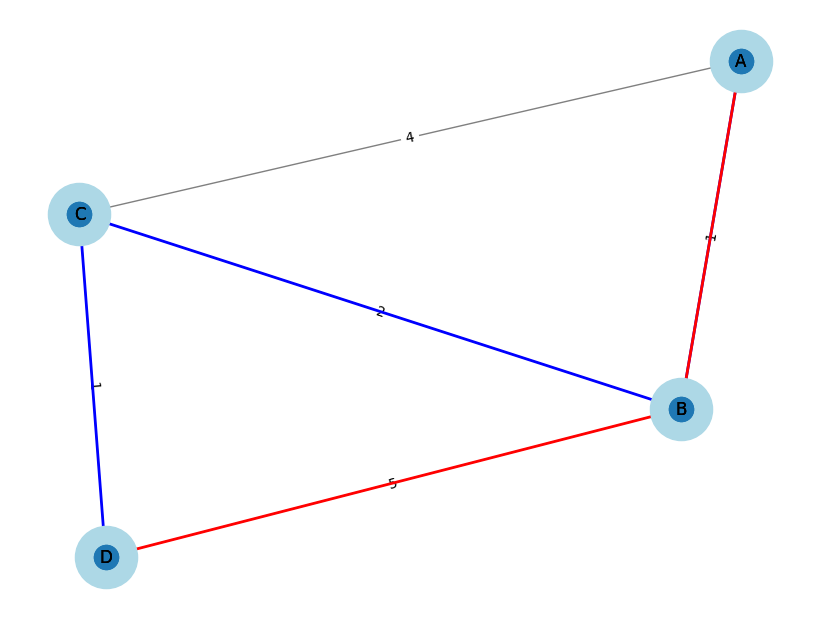

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()
    
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return path, cost
        
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))
    
    return None, float('inf')

def bfs_unweighted(graph, start, goal):
    queue = [(start, [start])]
    visited = set()
    
    while queue:
        node, path = queue.pop(0)
        
        if node == goal:
            return path
        
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return None

def visualize_graph(graph, path_ucs, path_bfs):
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if path_ucs:
        edges_ucs = [(path_ucs[i], path_ucs[i+1]) for i in range(len(path_ucs)-1)]
        nx.draw(G, pos, edgelist=edges_ucs, edge_color='blue', width=2, with_labels=True)
    
    if path_bfs:
        edges_bfs = [(path_bfs[i], path_bfs[i+1]) for i in range(len(path_bfs)-1)]
        nx.draw(G, pos, edgelist=edges_bfs, edge_color='red', width=2, with_labels=True)
    
    plt.show()

if __name__ == "__main__":
    graph_weighted = {
        'A': [('B', 1), ('C', 4)],
        'B': [('A', 1), ('C', 2), ('D', 5)],
        'C': [('A', 4), ('B', 2), ('D', 1)],
        'D': [('B', 5), ('C', 1)]
    }
    
    graph_unweighted = {
        'A': ['B', 'C'],
        'B': ['A', 'C', 'D'],
        'C': ['A', 'B', 'D'],
        'D': ['B', 'C']
    }
    
    start, goal = 'A', 'D'
    
    path_ucs, cost = uniform_cost_search(graph_weighted, start, goal)
    path_bfs = bfs_unweighted(graph_unweighted, start, goal)
    
    print(f"UCS Path: {path_ucs} with cost {cost}")
    print(f"BFS Path: {path_bfs}")
    
    visualize_graph(graph_weighted, path_ucs, path_bfs)
